# Theory of RNNs

## https://www.youtube.com/watch?v=DFZ1UA7-fxY

---

# Imports

In [129]:
import numpy as np
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import string
import os
import shutil
import re

#tensorflow = library specializing in neural networks
import tensorflow as tf

#keras = python interface for neural networks
#runs on top of tensorflow (tensorflow is backend)
#more use friendly

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import TextVectorization
from keras.optimizers import Adam

from sklearn.linear_model import LinearRegression

---

# Generate Training Data

In [130]:
#generate sequence
sequence = np.array(list(range(10))).astype(float)

In [131]:
sequence

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [132]:
#number of training words
window_size = 3

In [133]:
#generate training data
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [134]:
train_data.shape

(70, 3, 1)

In [135]:
train_data[:3]

array([[[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]]])

In [136]:
#get training labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [137]:
train_label[:3]

array([[3.],
       [4.],
       [5.]])

# Train Model

In [138]:
#init model
model = Sequential()  

#RNN
model.add(SimpleRNN(1, activation='linear'))

#compile model
opt = Adam(learning_rate=1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

#train model
model.fit(train_data, train_label, epochs=100, verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 2s 5ms/step - loss: 15.7723 - mse: 15.7723
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 29.6457 - mse: 29.6457
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 54.5355 - mse: 54.5355
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 12.4757 - mse: 12.4757
Ep

3/3 [==============================] - 0s 5ms/step - loss: 1.2899e-08 - mse: 1.2899e-08
Epoch 76/100
3/3 [==============================] - 0s 6ms/step - loss: 8.4643e-09 - mse: 8.4643e-09
Epoch 77/100
3/3 [==============================] - 0s 5ms/step - loss: 2.5840e-09 - mse: 2.5840e-09
Epoch 78/100
3/3 [==============================] - 0s 6ms/step - loss: 2.1872e-09 - mse: 2.1872e-09
Epoch 79/100
3/3 [==============================] - 0s 6ms/step - loss: 4.8965e-09 - mse: 4.8965e-09
Epoch 80/100
3/3 [==============================] - 0s 6ms/step - loss: 4.5852e-09 - mse: 4.5852e-09
Epoch 81/100
3/3 [==============================] - 0s 5ms/step - loss: 2.3975e-09 - mse: 2.3975e-09
Epoch 82/100
3/3 [==============================] - 0s 6ms/step - loss: 7.5539e-10 - mse: 7.5539e-10
Epoch 83/100
3/3 [==============================] - 0s 7ms/step - loss: 1.3258e-09 - mse: 1.3258e-09
Epoch 84/100
3/3 [==============================] - 0s 5ms/step - loss: 1.7825e-09 - mse: 1.7825e-09
Epo

In [139]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Hmm why are there 3 parameters and not 4?

## SimpleRNN simply uses the output layer as the hidden state:
https://datascience.stackexchange.com/questions/94644/does-the-simplernn-in-keras-have-a-hidden-state-or-does-it-just-use-the-output

# Predict Using Model

## On Known Data

In [140]:
#make predictions using the model
preds = model.predict(train_data).flatten()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 0s 4ms/step


In [141]:
#print some outputs
for i in range(len(preds[:3])):
    example = train_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[0. 1. 2.] -> 2.9999990463256836
[1. 2. 3.] -> 3.99999737739563
[2. 3. 4.] -> 4.999996185302734


Text(0, 0.5, 'actual')

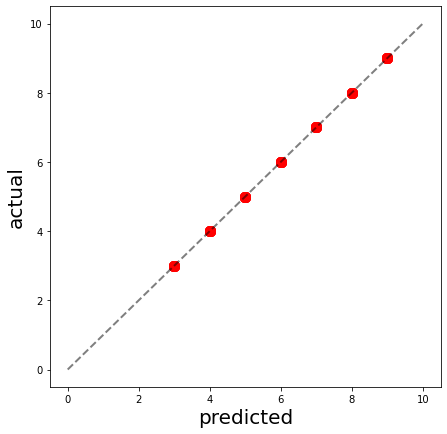

In [142]:
plt.figure(figsize=(7,7))
actuals = train_label.flatten()
plt.plot([0,10], [0,10], color='k', linestyle='--', alpha=0.5, linewidth=2)
plt.scatter(preds, actuals, s=100, color='r')
plt.xlabel('predicted', fontsize=20)
plt.ylabel('actual', fontsize=20)

## On Unknown Data

In [143]:
out_of_sample_data = np.array([[6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12]]).reshape(5,3,1)

In [144]:
#make predictions using the model
preds = model.predict(out_of_sample_data).flatten()

1/1 [==============================] - 0s 310ms/step


In [145]:
#print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 8.999991416931152
[7 8 9] -> 9.999990463256836
[ 8  9 10] -> 10.99998950958252
[ 9 10 11] -> 11.999988555908203
[10 11 12] -> 12.99998664855957


# A Look Under the Hood

In [146]:
#input vector weights in RNN (U)
model.weights[0].numpy()

array([[0.9306787]], dtype=float32)

In [147]:
#recurrent state weights in RNN (V)
model.weights[1].numpy()

array([[0.06963436]], dtype=float32)

In [148]:
#bias term weights in RNN (b)
model.weights[2].numpy()

array([0.99939597], dtype=float32)

# So the model has learned that
## $y_t = 0.93x_t + 0.07y_{t-1} + 1$
## $y_t = 0.93x_t + 0.07x_t + 1$
## $y_t = x_t + 1$

# But ... this isn't that impressive

In [149]:
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

LinearRegression()

In [150]:
#make predictions using the linear model
n = out_of_sample_data.shape[0]
preds = clf.predict(out_of_sample_data.reshape(n,-1)).flatten()

In [151]:
#print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 9.0
[7 8 9] -> 10.0
[ 8  9 10] -> 11.0
[ 9 10 11] -> 11.999999999999998
[10 11 12] -> 13.0


---

# Harder Case

In [152]:
def sigmoid(v):
    return 1.0 / (1.0 + np.exp(-v))

In [153]:
sequence = np.sin(np.arange(0,6*3.14159,0.1))
sequence += np.random.normal(0,0.05,len(sequence))

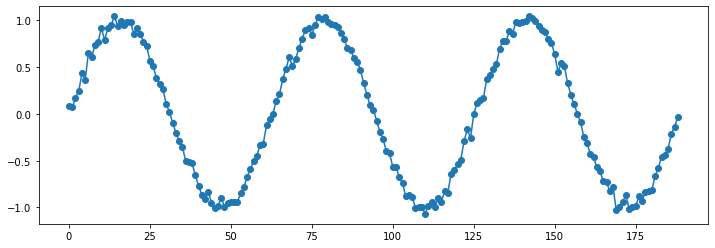

In [154]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)

In [155]:
#generate training data
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [156]:
#get training labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

## Try a Linear Model

In [157]:
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

LinearRegression()

In [158]:
#make predictions using the linear model
preds = []
input_vec = train_data[-1].copy()
for _ in range(15):
    pred = clf.predict(input_vec.reshape(1,-1)).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

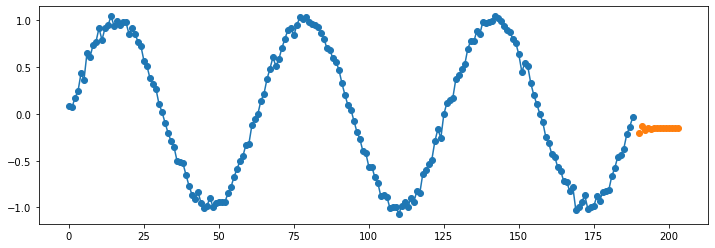

In [159]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence)+1, len(sequence)+15), preds[1:])

## Train an RNN

In [160]:
#init model
model = Sequential()  

#RNN
model.add(SimpleRNN(2, activation='tanh'))

#Dense layer
model.add(Dense(1))

#compile model
opt = Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

#train model
model.fit(train_data, train_label, epochs=25, verbose=1)

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
59/59 [==============================] - 2s 4ms/step - loss: 0.0144 - mse: 0.0144
Epoch 2/25
59/59 [==============================] - 0s 4ms/step - loss: 0.0076 - mse: 0.0076
Epoch 3/25
59/59 [==============================] - 0s 5ms/step - loss: 0.0071 - mse: 0.0071
Epoch 4/25
59/59 [==============================] - 0s 7ms/step - loss: 0.0069 - mse: 0.0069
Epoch 

In [161]:
#make predictions using the linear model
preds = []
input_vec = train_data[-1:].copy()
for _ in range(15):
    pred = model.predict(input_vec).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 73ms/step


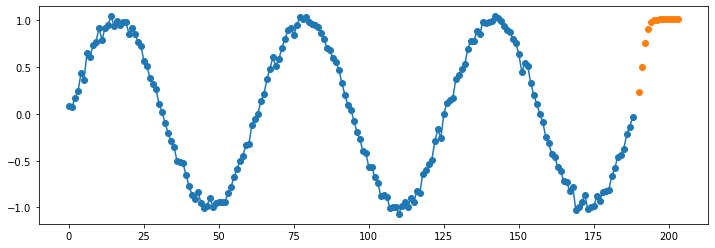

In [162]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence)+1, len(sequence)+15), preds[1:])

---

# Application to NLP

## First cells copied from this tutorial: https://www.tensorflow.org/text/guide/word_embeddings

In [163]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [164]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [165]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [166]:
batch_size = 1024
seed = 123
train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='training', seed=seed)
val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size, validation_split=0.2,
    subset='validation', seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [167]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(label_batch[i].numpy(), text_batch.numpy()[i])
        print()

0 b"Oh My God! Please, for the love of all that is holy, Do Not Watch This Movie! It it 82 minutes of my life I will never get back. Sure, I could have stopped watching half way through. But I thought it might get better. It Didn't. Anyone who actually enjoyed this movie is one seriously sick and twisted individual. No wonder us Australians/New Zealanders have a terrible reputation when it comes to making movies. Everything about this movie is horrible, from the acting to the editing. I don't even normally write reviews on here, but in this case I'll make an exception. I only wish someone had of warned me before I hired this catastrophe"

1 b'This movie is SOOOO funny!!! The acting is WONDERFUL, the Ramones are sexy, the jokes are subtle, and the plot is just what every high schooler dreams of doing to his/her school. I absolutely loved the soundtrack as well as the carefully placed cynicism. If you like monty python, You will love this film. This movie is a tad bit "grease"esk (withou

In [168]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [170]:
# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')


# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [171]:
embedding_dim=16

model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    SimpleRNN(8),
    Dense(1, activation='sigmoid')
])

In [172]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [173]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\ritvik\Anaconda3\lib\site-packages\keras\backend.py:5674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits, "Sigmoid", "binary_crossentropy"


20/20 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5292WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A45C277CA8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
20/20 [==============================] - 12s 475ms/step - loss: 0.6916 - accuracy: 0.5292 - val_loss: 0.6804 - val_accuracy: 0.6044
Epoch 2/15


In [174]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 8)                 200       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 160,209
Trainable params: 160,209
Non-trainable params: 0
_________________________________________________________________


In [176]:
while True:
    curr_input = input()
    if curr_input == 'quit':
        break
    pred = model.predict([[curr_input]], verbose=False)[0][0]
    print(pred)
    print()

i love this movie
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0.9089407

i hate this movie
0.42265436

i think this movie was a waste of money
0.09697387

the acting was really good
0.16855498

i thought the special effects were good but the plot was pretty bad
0.49389336

10/10!!! This movie has to be in my top 10 greatest Marvel Studios movie of all time. First, I love how great everyone did in the cast and all who c

KeyboardInterrupt: Interrupted by user